Training samples: 11314
Testing samples: 7532


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Best Logistic Regression Params: {'C': 10}
Logistic Regression:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64       319
           1       0.58      0.63      0.60       389
           2       0.65      0.62      0.64       394
           3       0.60      0.64      0.62       392
           4       0.71      0.74      0.72       385
           5       0.72      0.68      0.70       395
           6       0.74      0.80      0.77       390
           7       0.82      0.79      0.81       396
           8       0.88      0.88      0.88       398
           9       0.83      0.86      0.85       397
          10       0.94      0.87      0.90       399
          11       0.92      0.80      0.86       396
          12       0.59      0.68      0.63       393
          13       0.79      0.75      0.77       396
          14       0.86      0.84      0.85       394
          15       0.74      0.80      0.77       398
          16    

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3811 - loss: 2.7725 - val_accuracy: 0.7229 - val_loss: 1.7132
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7843 - loss: 1.2967 - val_accuracy: 0.7455 - val_loss: 1.0233
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8477 - loss: 0.6952 - val_accuracy: 0.7544 - val_loss: 0.8682
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8912 - loss: 0.4912 - val_accuracy: 0.7601 - val_loss: 0.8154
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9114 - loss: 0.3836 - val_accuracy: 0.7601 - val_loss: 0.7961


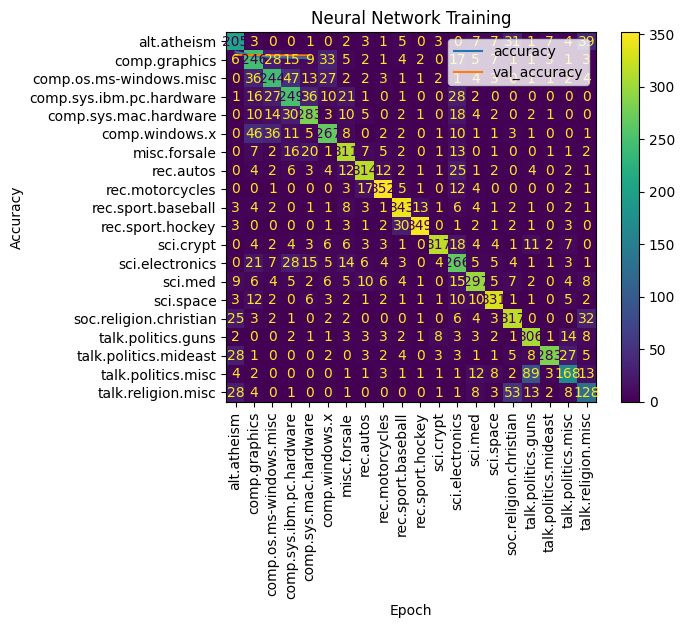

Naive Bayes:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63       319
           1       0.55      0.66      0.60       389
           2       0.62      0.69      0.65       394
           3       0.64      0.66      0.65       392
           4       0.70      0.71      0.71       385
           5       0.74      0.69      0.72       395
           6       0.79      0.81      0.80       390
           7       0.80      0.82      0.81       396
           8       0.87      0.89      0.88       398
           9       0.79      0.86      0.83       397
          10       0.90      0.89      0.90       399
          11       0.90      0.84      0.87       396
          12       0.64      0.59      0.61       393
          13       0.83      0.73      0.78       396
          14       0.87      0.85      0.86       394
          15       0.62      0.91      0.74       398
          16       0.65      0.91      0.76       364
          17 

In [3]:
# Document Classification System with ML, Deep Learning, and Real-World File Processing

# Step 1: Load Dataset
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

print(f"Training samples: {len(newsgroups_train.data)}")
print(f"Testing samples: {len(newsgroups_test.data)}")

# Step 2: Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens
              if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

newsgroups_train.data = [preprocess(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess(text) for text in newsgroups_test.data]

# Step 3: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Step 4: Logistic Regression with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10]}
logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
logreg.fit(X_train, y_train)

print("Best Logistic Regression Params:", logreg.best_params_)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm, display_labels=newsgroups_test.target_names).plot(xticks_rotation=90)

# Step 5: Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train.toarray(), y_train, epochs=5, batch_size=128, validation_data=(X_test.toarray(), y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Neural Network Training")
plt.show()

# Step 6: Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Step 7: Ensemble Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
ensemble = VotingClassifier(estimators=[
    ('lr', logreg.best_estimator_),
    ('nb', nb),
    ('knn', knn)
], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Model:\n", classification_report(y_test, y_pred_ensemble))

# Step 8: File Upload & Prediction
import os
import PyPDF2
import docx


def read_document(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == '.txt':
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    elif ext == '.pdf':
        reader = PyPDF2.PdfReader(file_path)
        return " ".join(page.extract_text() for page in reader.pages)
    elif ext == '.docx':
        doc = docx.Document(file_path)
        return '\n'.join([p.text for p in doc.paragraphs])
    else:
        raise ValueError("Unsupported file format")

file_path = '/content/OptiSphere 2025.pdf'
doc_text = read_document(file_path)
doc_preprocessed = preprocess(doc_text)
doc_vector = vectorizer.transform([doc_preprocessed])
predicted = ensemble.predict(doc_vector)
print("Predicted Category:", newsgroups_train.target_names[predicted[0]])

In [1]:
pip install 'PyPDF2<3.0'

In [2]:
 pip install python-docx